In [5]:
%matplotlib inline

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets

from shapely.geometry import Point
import networkx as nx
from networkx.algorithms import community

# Working with Spatial Data and Network Analysis
## Live

In [7]:
earthquake_data = pd.read_csv("./data/earthquakes.csv")

In [8]:
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [9]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [10]:
earthquake_data['Magnitude Type'].astype('category')

0         MW
1         MW
2         MW
3         MW
4         MW
        ... 
23407     ML
23408     ML
23409    MWW
23410    MWW
23411     MB
Name: Magnitude Type, Length: 23412, dtype: category
Categories (10, object): ['MB', 'MD', 'MH', 'ML', ..., 'MWB', 'MWC', 'MWR', 'MWW']

(array([8.669e+03, 5.438e+03, 3.532e+03, 2.125e+03, 7.680e+02, 1.042e+03,
        6.770e+02, 4.230e+02, 2.910e+02, 1.020e+02, 1.220e+02, 9.200e+01,
        7.000e+01, 3.400e+01, 7.000e+00, 1.200e+01, 2.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00]),
 array([5.5 , 5.68, 5.86, 6.04, 6.22, 6.4 , 6.58, 6.76, 6.94, 7.12, 7.3 ,
        7.48, 7.66, 7.84, 8.02, 8.2 , 8.38, 8.56, 8.74, 8.92, 9.1 ]),
 <BarContainer object of 20 artists>)

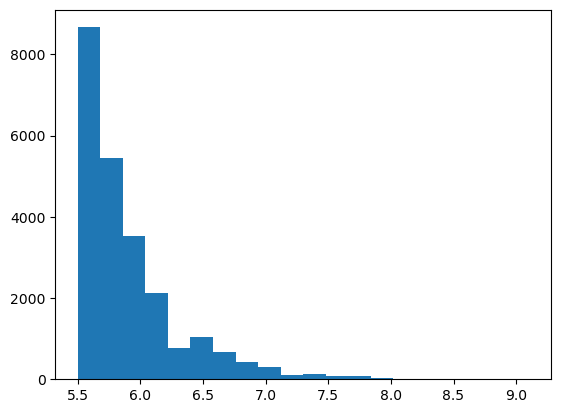

In [11]:
plt.hist(earthquake_data.Magnitude, bins= 20)

In [12]:
earthquake_data.nlargest(5, 'Magnitude')

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
17083,12/26/2004,00:58:53,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,...,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed
20501,03/11/2011,05:46:24,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,...,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed
19928,02/27/2010,06:34:12,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,...,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed
16,02/04/1965,05:01:22,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
17329,03/28/2005,16:09:37,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,...,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed


In [13]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

In [14]:
earthquake_data = earthquake_data.drop(columns=["Date", "Time"])

In [17]:
geodatasets.data.naturalearth.land.url

'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip'

In [19]:
land = gpd.read_file(geodatasets.data.naturalearth.land.url)
land

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Land,0,0.0,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Land,0,0.0,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


In [20]:
land.dtypes

featurecla      object
scalerank        int64
min_zoom       float64
geometry      geometry
dtype: object

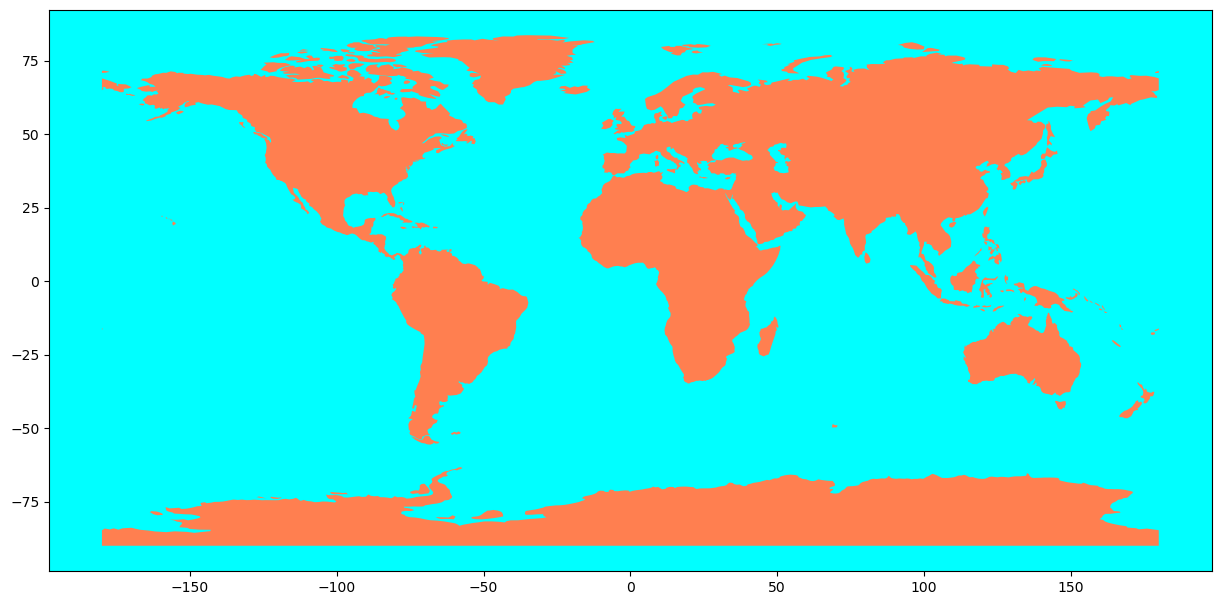

In [24]:
ax = land.plot(figsize = (15, 12), color= 'coral')
ax.set_facecolor("aqua")

<AxesSubplot:>

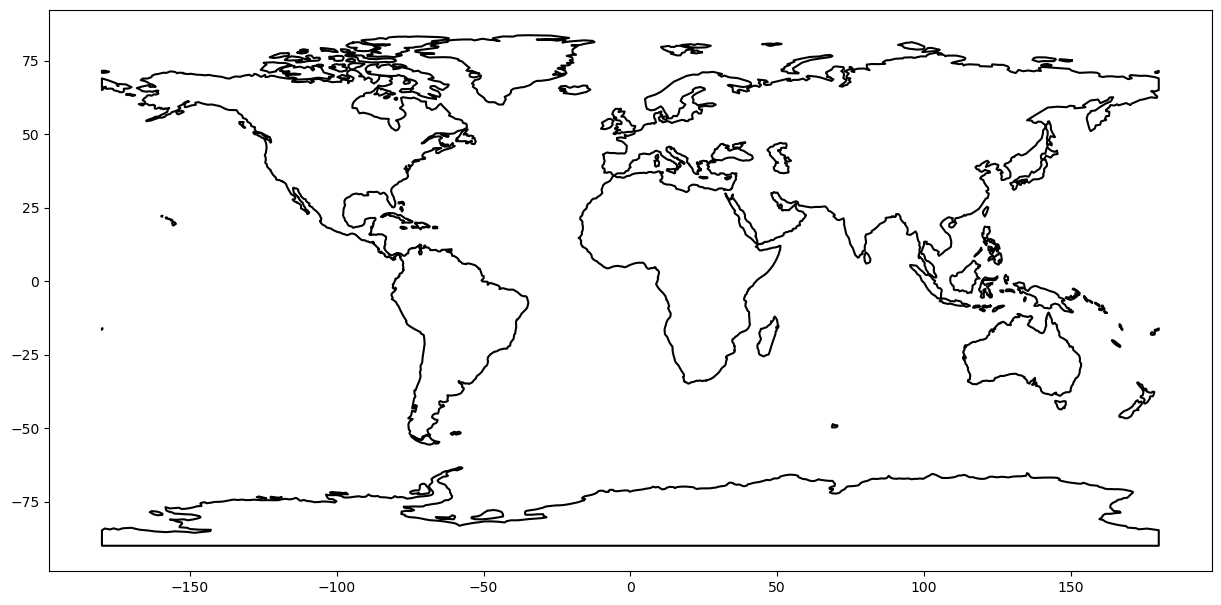

In [27]:
land.boundary.plot(figsize = (15, 12), color= 'black')

Text(142.84722222222223, 0.5, 'Latitude')

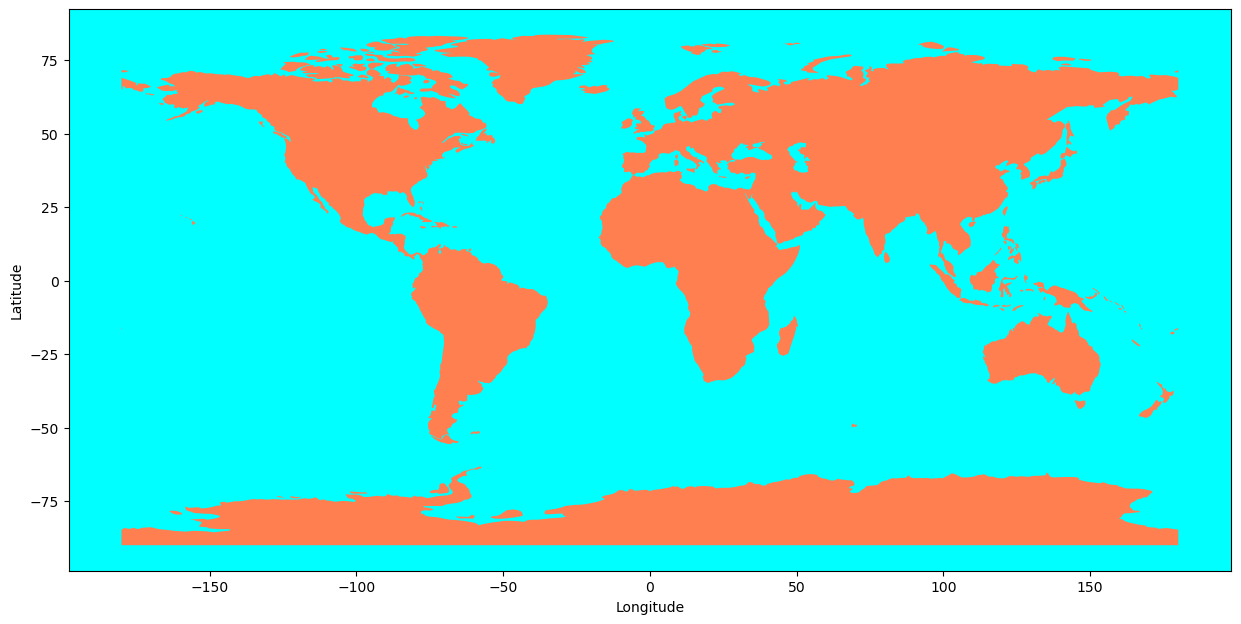

In [30]:
ax = land.plot(figsize = (15, 12), color= 'coral')
ax.set_facecolor("aqua")

plt.xlabel('Longitude')
plt.ylabel('Latitude')

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
0,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
23408,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
23409,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51
23410,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19


In [44]:
points = [Point(x) for x in zip(earthquake_data.Longitude, earthquake_data.Latitude)]

In [45]:
points

[<POINT (146 19.2)>,
 <POINT (127 1.86)>,
 <POINT (-174 -20.6)>,
 <POINT (-23.6 -59.1)>,
 <POINT (126 11.9)>,
 <POINT (167 -13.4)>,
 <POINT (87.9 27.4)>,
 <POINT (166 -13.3)>,
 <POINT (-27 -56.5)>,
 <POINT (178 -24.6)>,
 <POINT (109 -6.81)>,
 <POINT (126 -2.61)>,
 <POINT (162 54.6)>,
 <POINT (-178 -18.7)>,
 <POINT (73.3 37.5)>,
 <POINT (140 -51.8)>,
 <POINT (179 51.3)>,
 <POINT (175 51.6)>,
 <POINT (172 52.5)>,
 <POINT (176 51.6)>,
 <POINT (178 51)>,
 <POINT (174 51.7)>,
 <POINT (173 51.8)>,
 <POINT (173 52.6)>,
 <POINT (174 51.8)>,
 <POINT (174 51.9)>,
 <POINT (180 51.4)>,
 <POINT (172 52.8)>,
 <POINT (175 51.8)>,
 <POINT (171 53)>,
 <POINT (171 53)>,
 <POINT (175 51.5)>,
 <POINT (-44.9 13.2)>,
 <POINT (174 51.8)>,
 <POINT (175 51.8)>,
 <POINT (174 52.4)>,
 <POINT (174 51.9)>,
 <POINT (175 51.7)>,
 <POINT (177 51.5)>,
 <POINT (-162 53)>,
 <POINT (176 52.2)>,
 <POINT (173 52.1)>,
 <POINT (175 51.7)>,
 <POINT (174 52.1)>,
 <POINT (-162 53.2)>,
 <POINT (176 51.4)>,
 <POINT (173 51.3)>,
 

<AxesSubplot:>

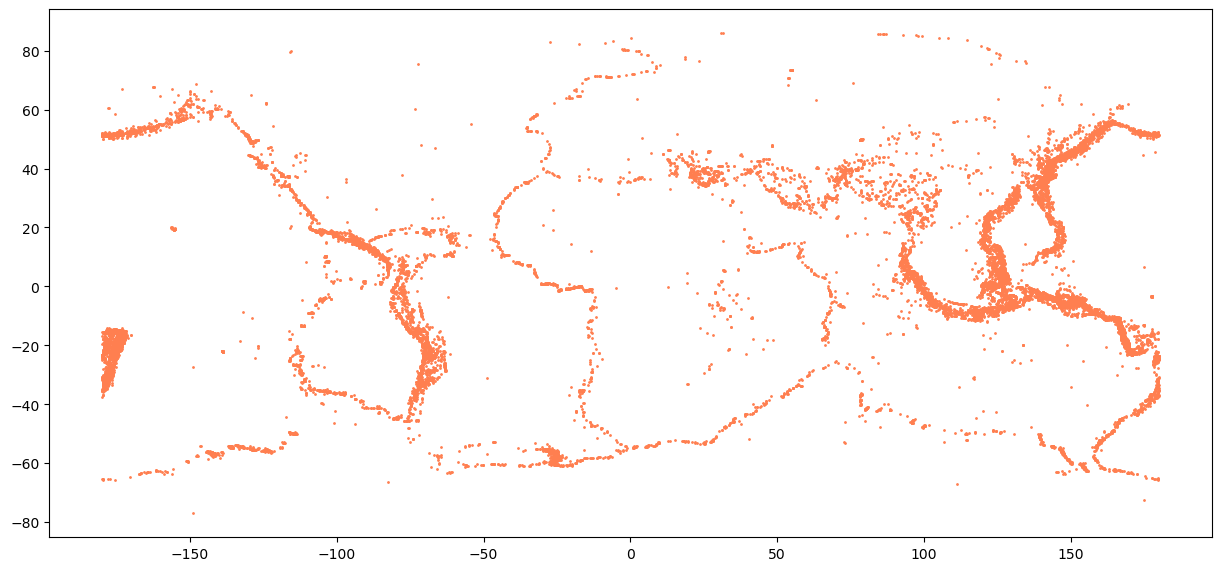

In [46]:
eq_df = gpd.GeoDataFrame(data= earthquake_data, geometry= points, crs='epsg:4326')
eq_df.plot(figsize = (15, 12), color= 'coral', markersize = 1)

Text(142.84722222222223, 0.5, 'Latitude')

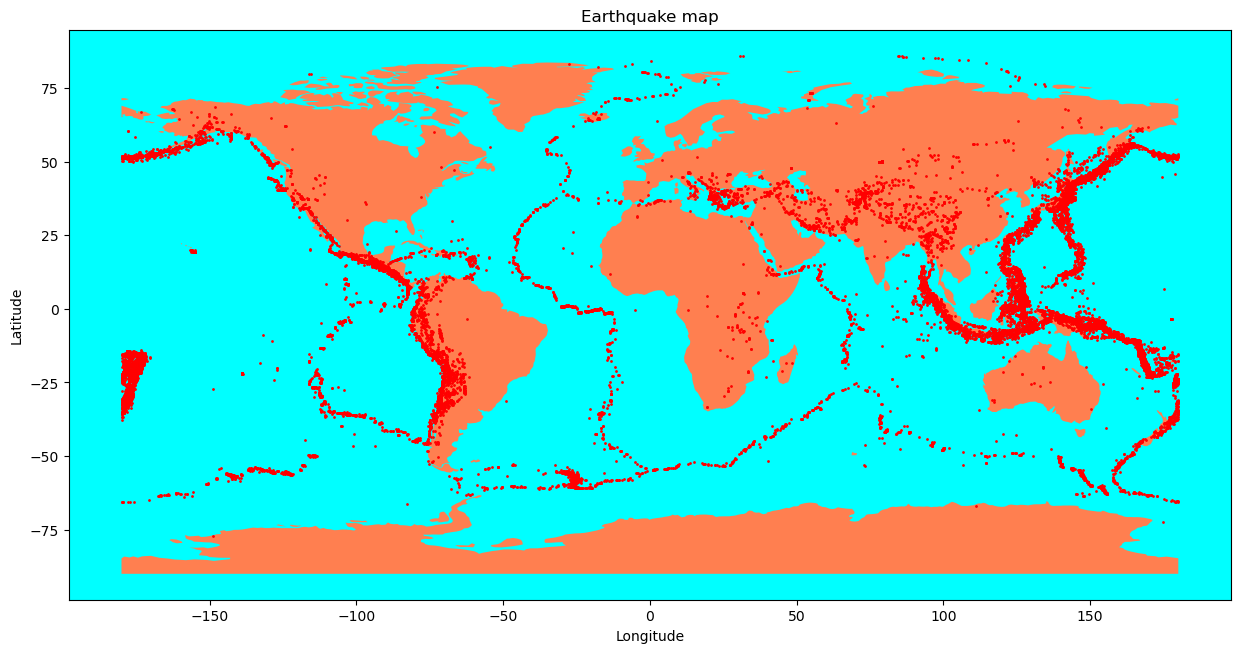

In [47]:
ax = land.plot(figsize = (15, 12), color= 'coral')
ax.set_facecolor("aqua")

eq_df.plot(ax=ax, c ='r', markersize = 1)

plt.title('Earthquake map')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [50]:
volcano_data = pd.read_csv("./data/volcanos.csv")
volcano_data

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [51]:
volcano_points = [Point(x) for x in zip(volcano_data.Longitude, volcano_data.Latitude)]

<AxesSubplot:>

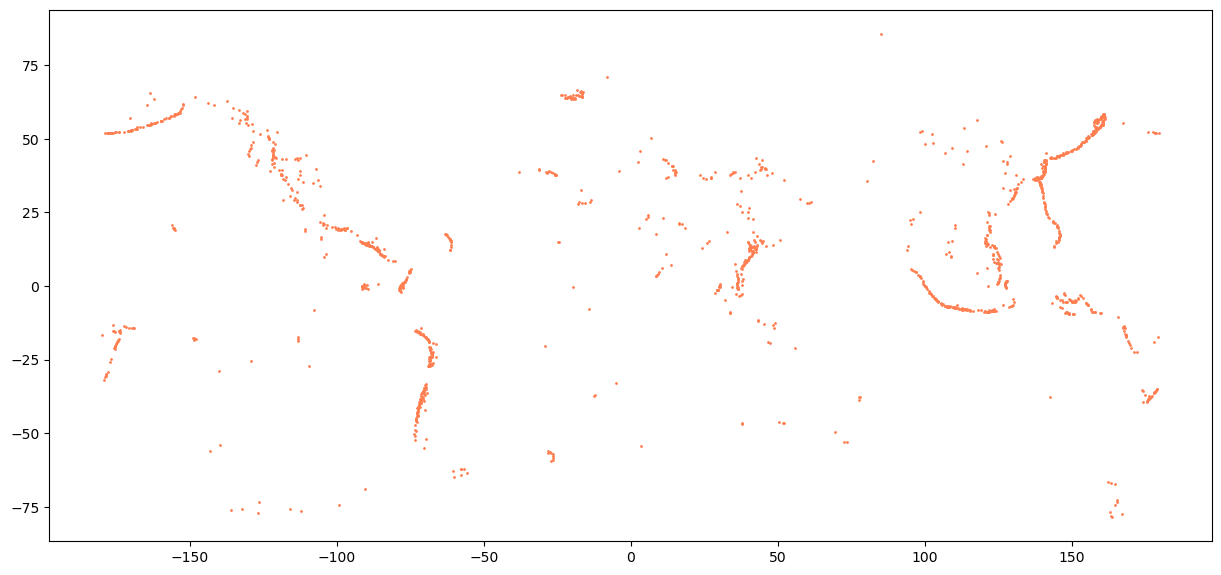

In [52]:
volc_df = gpd.GeoDataFrame(data= volcano_data, geometry= volcano_points, crs='epsg:4326')
volc_df.plot(figsize = (15, 12), color= 'coral', markersize = 1)

Text(142.84722222222223, 0.5, 'Latitude')

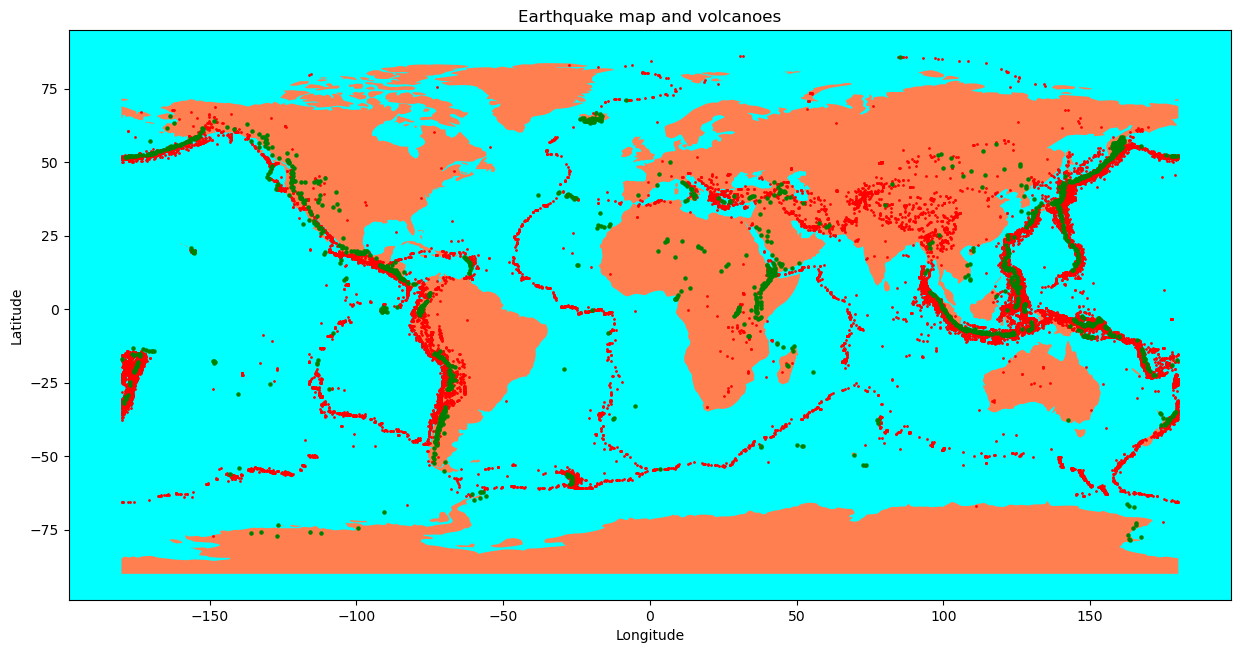

In [54]:
ax = land.plot(figsize = (15, 12), color= 'coral')
ax.set_facecolor("aqua")

eq_df.plot(ax=ax, c ='r', markersize = 1)
volc_df.plot(ax=ax, c= 'g', markersize = 5)

plt.title('Earthquake map and volcanoes')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [92]:
states = gpd.read_file("./data/s_22mr22/")
states

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.240980,64.240190,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


(22.5, 52.5)

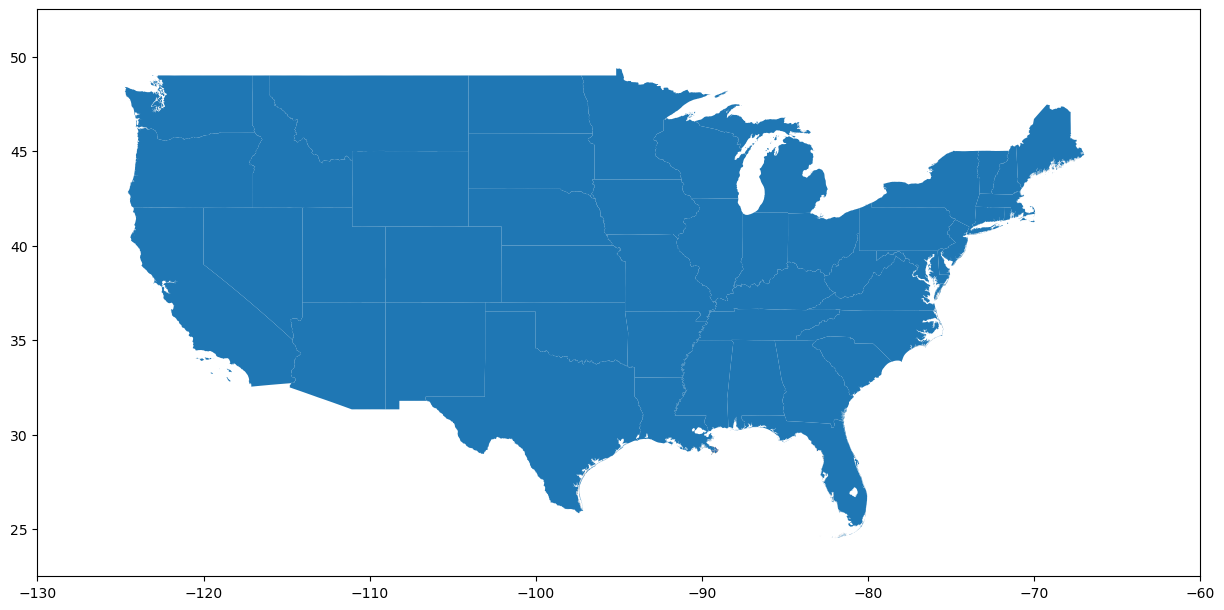

In [61]:
ax = states.plot(figsize=(15,12))
ax.set_xlim(-130, -60)
ax.set_ylim(22.5, 52.5)

In [71]:
ufos = pd.read_csv("./data/ufo_sightings_scrubbed.csv", low_memory=False)

In [72]:
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [73]:
ufos = ufos[ufos.country == "us"]
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [75]:
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,tn,36.1658333,-86.784444
80328,9/9/2013 22:00,us,id,43.6136111,-116.202500
80329,9/9/2013 22:00,us,ca,38.2972222,-122.284444
80330,9/9/2013 22:20,us,va,38.9011111,-77.265556


In [77]:
num_sightings = ufos.groupby('state').size()

In [78]:
state_names = pd.read_csv("./data/states.csv")

In [79]:
state_names

,abbreviation,name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DC,District of Columbia
9,DE,Delaware


In [83]:
num_sightings = num_sightings.reset_index().rename(columns={0: "count"})

In [85]:
num_sightings.state = num_sightings.state.str.upper()

In [86]:
num_sightings

,state,count
0,AK,319
1,AL,642
2,AR,588
3,AZ,2414
4,CA,8912
5,CO,1413
6,CT,892
7,DC,7
8,DE,166
9,FL,3835


In [90]:
num_sightings = num_sightings.merge(state_names, left_on='state', right_on='abbreviation')[["name", 'count']]

In [91]:
num_sightings

,name,count
0,Alaska,319
1,Alabama,642
2,Arkansas,588
3,Arizona,2414
4,California,8912
5,Colorado,1413
6,Connecticut,892
7,District of Columbia,7
8,Delaware,166
9,Florida,3835


In [101]:
num_sightings = num_sightings.merge(states, left_on='name', right_on='NAME')
num_sightings

,name,count,STATE_x,NAME_x,FIPS_x,LON_x,LAT_x,geometry_x,STATE_y,NAME_y,FIPS_y,LON_y,LAT_y,geometry_y
0,Alaska,319,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,Alabama,642,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,Arkansas,588,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,Arizona,2414,AZ,Arizona,04,-111.66457,34.29323,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773...",AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
4,California,8912,CA,California,06,-119.60818,37.24537,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
5,Colorado,1413,CO,Colorado,08,-105.54783,38.99855,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
6,Connecticut,892,CT,Connecticut,09,-72.72623,41.62196,"POLYGON ((-106.87560 41.00301, -106.85850 41.0...",CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
7,District of Columbia,7,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...",DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
8,Delaware,166,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...",DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."
9,Florida,3835,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...",FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ..."


<AxesSubplot:>

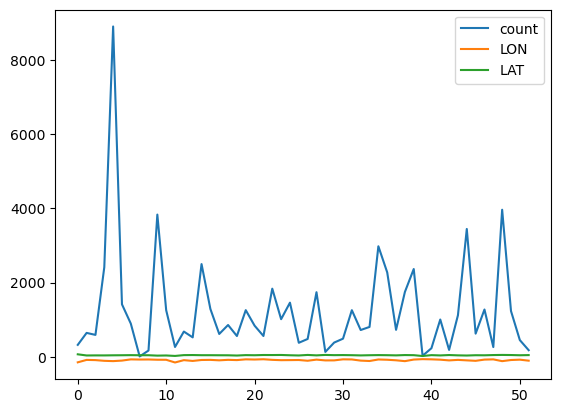

In [95]:
num_sightings.plot()

In [96]:
num_sightings = gpd.GeoDataFrame(data=num_sightings, geometry=states.geometry, crs = states.crs)

(22.5, 52.5)

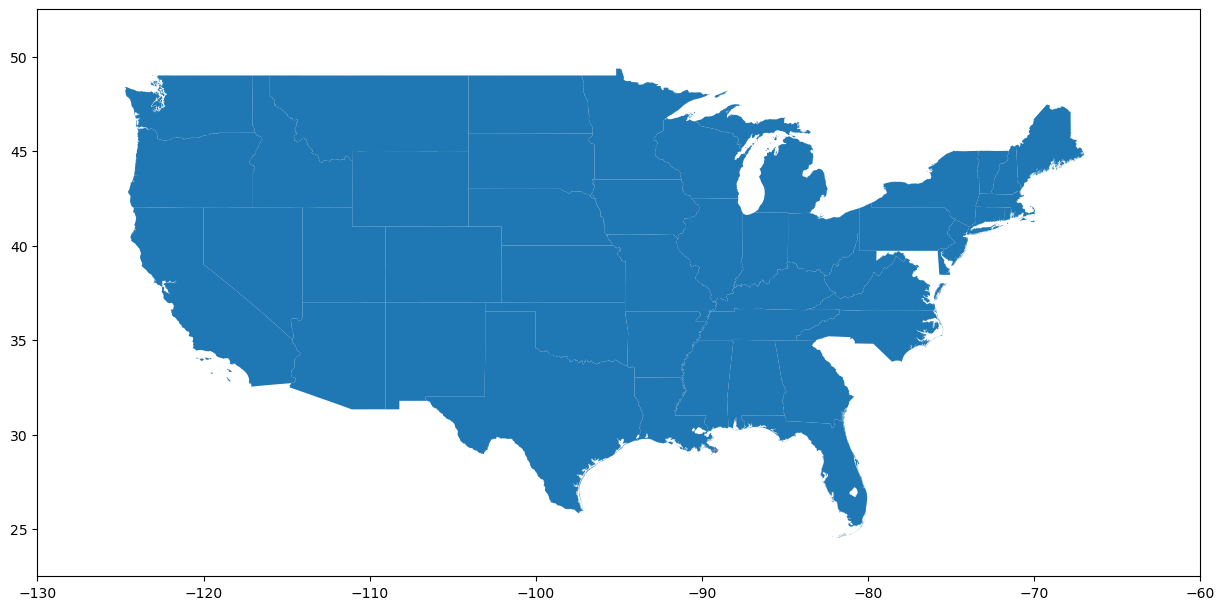

In [98]:
ax = num_sightings.plot(figsize=(15,12))
ax.set_xlim(-130, -60)
ax.set_ylim(22.5, 52.5)

(22.5, 52.5)

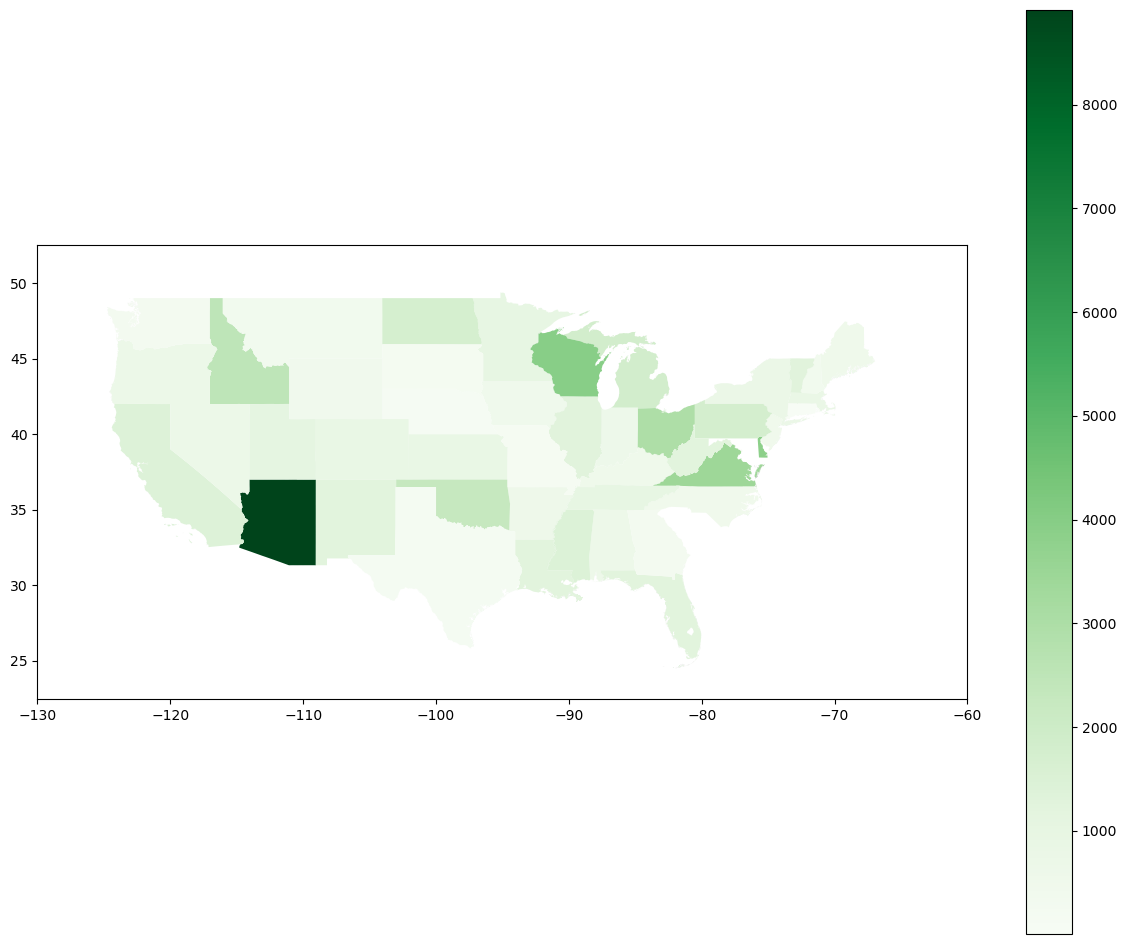

In [100]:
ax = num_sightings.plot(column='count', legend = True, cmap = "Greens", figsize=(15,12))
ax.set_xlim(-130, -60)
ax.set_ylim(22.5, 52.5)

In [103]:
num_sightings.columns

Index(['name', 'count', 'STATE_x', 'NAME_x', 'FIPS_x', 'LON_x', 'LAT_x',
       'geometry_x', 'STATE_y', 'NAME_y', 'FIPS_y', 'LON_y', 'LAT_y',
       'geometry_y'],
      dtype='object')

In [2]:
g = nx.Graph()

In [4]:
# NOTE: weight is a user defined name, it can be anything
# this is what we pass in as the weight parameter for shortest_path
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

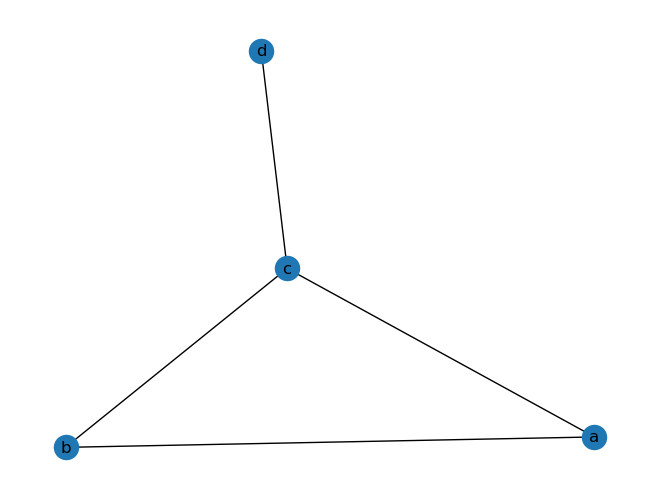

In [6]:
nx.draw(g, with_labels = True)

In [9]:
nx.shortest_path(g, 'a', 'd', weight='weight')

['a', 'c', 'd']

In [11]:
nx.shortest_path_length(g, 'a', 'd', weight='weight')

3.2

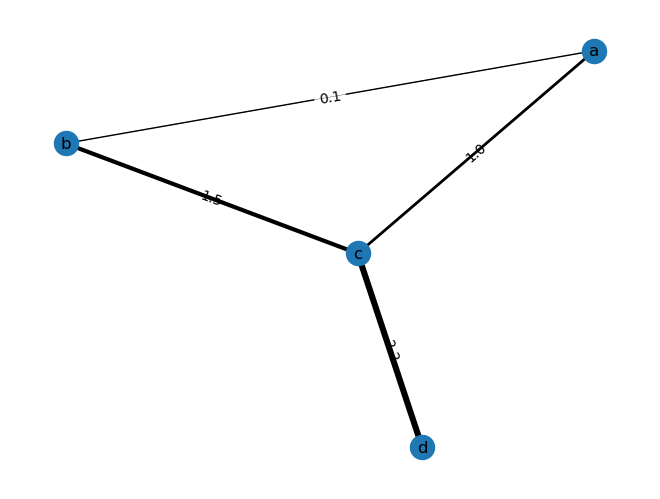

In [12]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()


In [13]:
g = nx.DiGraph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

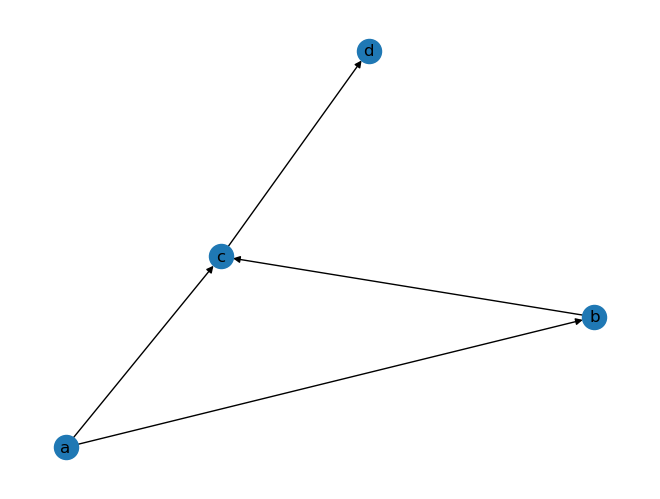

In [17]:
nx.draw(g, with_labels = True)

In [15]:
print(nx.shortest_path(g, "b", "d"))
print(nx.shortest_path(g, "d", "b"))

['b', 'c', 'd']


NetworkXNoPath: No path between d and b.

In [20]:
g = nx.Graph()
g.add_edge("a", "b")
g.add_edge("b", "d")
g.add_edge("d", "c")
g.add_edge("b", "d")
g.add_edge("a", "d")

g.add_edge("m", "n")
g.add_edge("n", "p")
g.add_edge("q", "n")

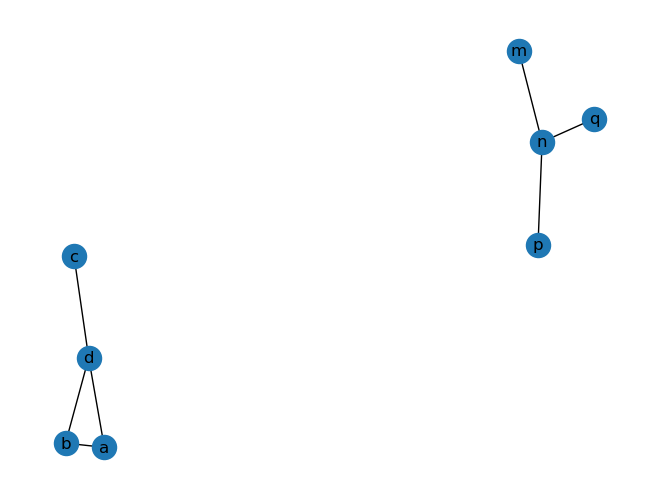

In [21]:
nx.draw(g, with_labels = True)

In [22]:
facebook_graph = nx.read_edgelist("./data/facebook_combined.txt")

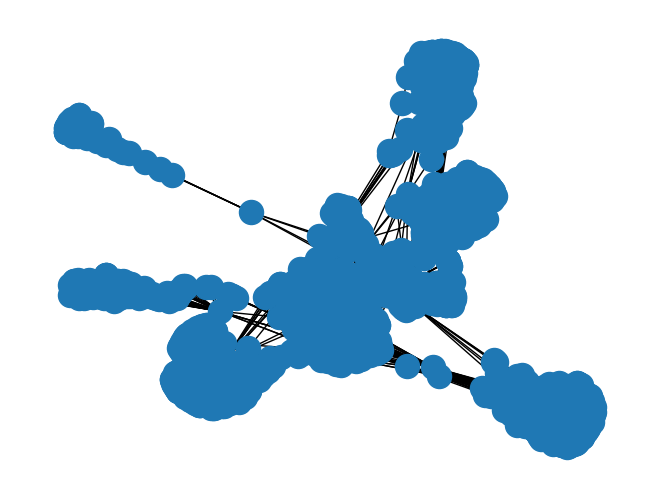

In [23]:
nx.draw(facebook_graph)

In [24]:
karate_graph = nx.karate_club_graph()

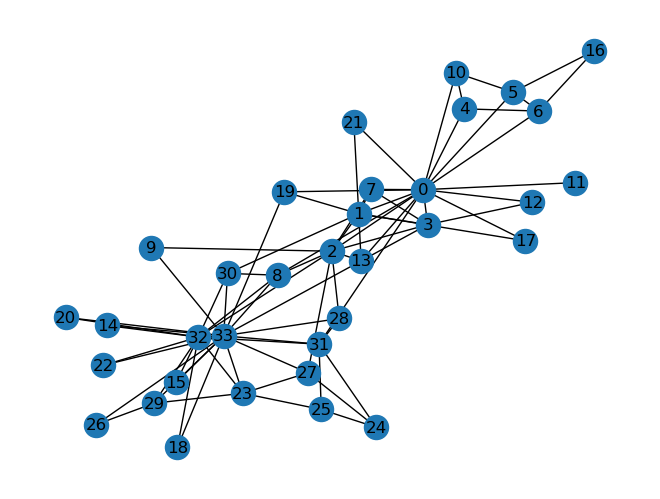

In [26]:
nx.draw(karate_graph, with_labels = True)

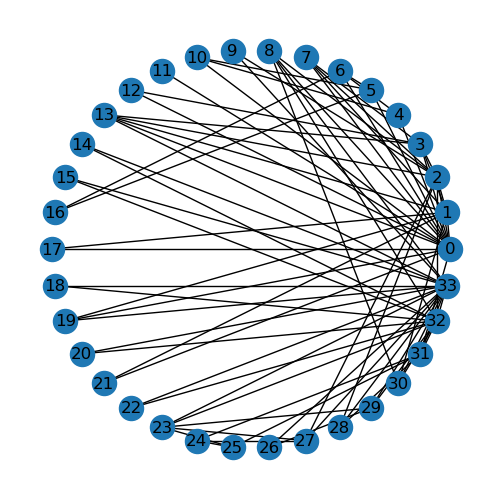

In [32]:
pos = nx.circular_layout(karate_graph)
nx.draw(karate_graph, pos, with_labels = True)
plt.gca().set_aspect('equal')

In [33]:
nx.betweenness_centrality(karate_graph)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

level 0 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
level 1 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
level 2 ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
level 3 ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {14}, {26})
level 4 ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 27, 28}, {4, 5, 6, 10, 16}, {32, 33, 8, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {14}, {15}, {24, 25, 31}, {26})


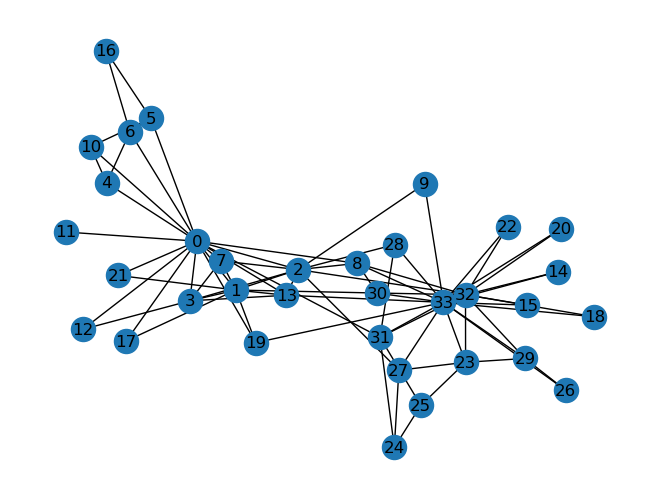

In [37]:
nx.draw(karate_graph, with_labels = True)
communities_generator = community.girvan_newman(karate_graph)
for i, x in enumerate(communities_generator):
  if i < 5:
    communities = next(communities_generator)
    print("level " + str(i), communities)